In [1]:
# python实现
import numpy as np
import pywt
import pandas as pd
import matplotlib.pylab as plt
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号



In [2]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 输入S为纯信号,是一个numpy的1D张量
# 输入SN为带噪信号，是一个numpy的1D张量
# 输出snr为信噪比，单位为dB，是一个32为的float数
def SNR(SN, S):
    # 其中S是纯信号，SN是带噪信号，snr是信噪比
    Ps = sum((S-(np.mean(S)))**2) #signal power
    Pn = sum((S-SN)** 2)# noise power
    snr = 10*math.log((Ps/Pn), 10)
    return(snr)


def print_metric(y_test, y_predict):
    mse = mean_squared_error(y_test, y_predict)

    mae = mean_absolute_error(y_test, y_predict)
    mape = np.mean(np.abs((y_predict - y_test) / y_test)) * 100
    r2 = r2_score(y_test, y_predict)
    snr = SNR(y_test, y_predict)
    rmse = np.sqrt(((y_predict - y_test) ** 2).mean())
    sse = np.sum((y_test - y_predict) ** 2)
    print('MSE:{} SSE：{} RMSE:{} SNR:{} MAE:{} MAPE:{} R2:{} '.format(mse, sse, rmse, snr, mae,mape, r2))
    return [mse, sse, rmse, snr, mae, mape, r2]


In [3]:
file = 99


# 1 选择去噪小波种类

In [4]:

# 使用小波分析进行阈值去噪声,使用pywt.threshold

'''
1.准备数据
2.创建小波对象并定义参数
3.小波分解
4.小波重构
5.绘图
'''

import matplotlib.pyplot as plt
import pywt
# 均方误差from sklearn.metrics import mean_absolute_error #平方绝对误差from sklearn.metrics import r2_score#R square#调用

metric_list = []
for obj in ['db2', 'db3', 'db4', 'bior2.2', 'rbio1.5', 'dmey']:
    # Get data:
    input_data = np.array(pd.read_csv(r"../data/{}.txt".format(file), sep='  ', header=None))
    if file>4:
        ecg = input_data
    else:
        ecg = input_data.T
    index = []
    data = []
    for i in range(ecg.shape[0]-1):
        X = float(i)
        Y = float(ecg[i])
        index.append(X)
        data.append(Y)

    # 创建小波对象并定义参数:
    w = pywt.Wavelet(obj)  # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    # print("maximum level is " + str(maxlev))
    threshold = 0.1  # Threshold for filtering

    # 分解为小波分量，直至选定的水平:
    coeffs = pywt.wavedec(data,obj, level=maxlev)  # 将信号进行小波分解

    plt.figure()
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波

    datarec = pywt.waverec(coeffs, obj)  # 将信号进行小波重构

    mintime = 0
    maxtime = mintime + len(data) + 1
    print('{}-----------------------------'.format(obj))
    tmplist = print_metric(ecg.reshape(-1,), datarec)
    metric_list.append(tmplist)


db2-----------------------------
MSE:0.0025516815441938854 SSE：10.451687605018154 RMSE:0.0505141717163994 SNR:9.587198606000612 MAE:0.03666463261200497 MAPE:516.4808041460402 R2:0.9261855753178737 
db3-----------------------------
MSE:0.0026043031238179304 SSE：10.667225595158243 RMSE:0.05103237329203816 SNR:9.468032801309413 MAE:0.03711310539775441 MAPE:137.29003934474528 R2:0.924663351028306 
db4-----------------------------
MSE:0.0028434260941130477 SSE：11.646673281487043 RMSE:0.05332378544433101 SNR:8.883413725991714 MAE:0.03842651052918658 MAPE:836.699480464644 R2:0.9177460597539391 
bior2.2-----------------------------
MSE:0.00262686765946844 SSE：10.75964993318273 RMSE:0.051252977079077465 SNR:9.37865491180559 MAE:0.03734792862113551 MAPE:190.94663150467034 R2:0.9240106096150792 
rbio1.5-----------------------------
MSE:0.002551163626189726 SSE：10.449566212873117 RMSE:0.05050904499383973 SNR:9.616498498429047 MAE:0.03694139835794985 MAPE:834.3507758572734 R2:0.926200557524253 
dme

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:

df = pd.DataFrame(metric_list, columns=['mse', 'sse', 'rmse', 'snr', 'mae', 'mape', 'r2'])
df.index = ['db3', 'db6', 'db9', 'bior2.2', 'rbio1.1', 'dmey']
# df.to_csv('./submit/{}_不同的小波误差.csv'.format(file))
df

,mse,sse,rmse,snr,mae,mape,r2
db3,0.002552,10.451688,0.050514,9.587199,0.036665,516.480804,0.926186
db6,0.002604,10.667226,0.051032,9.468033,0.037113,137.290039,0.924663
db9,0.002843,11.646673,0.053324,8.883414,0.038427,836.699480,0.917746
bior2.2,0.002627,10.759650,0.051253,9.378655,0.037348,190.946632,0.924011
rbio1.1,0.002551,10.449566,0.050509,9.616498,0.036941,834.350776,0.926201
dmey,0.002781,11.392152,0.052738,9.117537,0.037549,268.303466,0.919544


# 2 筛选阈值

In [6]:


# import matplotlib.pyplot as plt
# import pywt
# # 均方误差from sklearn.metrics import mean_absolute_error #平方绝对误差from sklearn.metrics import r2_score#R square#调用
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# metric_list = []
# for threshold in list(np.arange(0.01, 1.0, 0.01)):
#     obj ='dmey'
#     # Get data:
#     ecg = np.array(pd.read_csv(r"../data/1.txt", sep='  ', header=None)).T
#     index = []
#     data = []
#     for i in range(ecg.shape[0]-1):
#         X = float(i)
#         Y = float(ecg[i])
#         index.append(X)
#         data.append(Y)

#     # 创建小波对象并定义参数:
#     w = pywt.Wavelet(obj)  # 选用Daubechies8小波
#     maxlev = pywt.dwt_max_level(len(data), w.dec_len)
#     # 分解为小波分量，直至选定的水平:
#     coeffs = pywt.wavedec(data, obj, level=maxlev)  # 将信号进行小波分解

#     plt.figure()
#     for i in range(1, len(coeffs)):
#         coeffs[i] = pywt.threshold(
#             coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波

#     datarec = pywt.waverec(coeffs, obj)  # 将信号进行小波重构

#     mintime = 0
#     maxtime = mintime + len(data) + 1
#     print('{}-----------------------------'.format(threshold))
#     tmplist = print_metric(ecg.reshape(-1,), datarec)
#     metric_list.append(tmplist)



# 3 可视化去噪效果

In [5]:

file = 4
metric_list = []
obj = 'db9'  # ['db3', 'db6', 'db9', 'bior2.2', 'rbio1.1', 'dmey']:
# Get data:
input_data = np.array(pd.read_csv(r"./data/{}.txt".format(file), sep='  ', header=None))
if file > 4:
    ecg = input_data
else:
    ecg = input_data.T
index = []
data = []
for i in range(ecg.shape[0]-1):
    X = float(i)
    Y = float(ecg[i])
    index.append(X)
    data.append(Y)

# 创建小波对象并定义参数:
w = pywt.Wavelet(obj)  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
# print("maximum level is " + str(maxlev))
threshold = 0.10  # Threshold for filtering

# 分解为小波分量，直至选定的水平:
coeffs = pywt.wavedec(data, obj, level=maxlev)  # 将信号进行小波分解

plt.figure()
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(
        coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波

datarec = pywt.waverec(coeffs, obj)  # 将信号进行小波重构

mintime = 0
maxtime = mintime + len(data) + 1
print('{}-----------------------------'.format(obj))
tmplist = print_metric(ecg.reshape(-1,), datarec)
metric_list.append(tmplist)


db9-----------------------------
MSE:0.005119746379283133 SSE：20.970481169543714 RMSE:0.07155240302941009 SNR:9.30834598612033 MAE:0.05812499337600532 MAPE:72.78530925026185 R2:0.9268219269327492 


<Figure size 432x288 with 0 Axes>

In [18]:

df_dnoise =pd.DataFrame(columns=['原始信号','去噪信号'])
df_dnoise['原始信号'] = data[mintime:maxtime]
df_dnoise['去噪信号'] = datarec[mintime:maxtime-1]
df_dnoise.to_csv('./submit/{}_{}_信号去噪文件.csv'.format(obj,file), index=0)

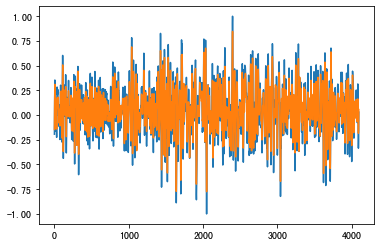

In [7]:
plt.figure()
plt.plot(index[mintime:maxtime], data[mintime:maxtime])
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime-1])
plt.savefig('1.png',kpi=300)
# plt.show()
